In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
#import peakutils
from sklearn.preprocessing import StandardScaler ,Normalizer
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
#import nippy
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

In [351]:
my_path = 'calibration_set/'
df_3 = pd.read_csv(my_path+'scanner_3.csv').drop(['WVN CM-1'],axis=1)
df_11 = pd.read_csv(my_path+'scanner_11.csv').drop(['WVN CM-1'],axis=1).drop(40,axis=0)
df_16 = pd.read_csv(my_path+'scanner_16.csv').drop(['WVN CM-1'],axis=1)
df_22 = pd.read_csv(my_path+'scanner_22.csv').drop(['WVN CM-1'],axis=1)
df_41 = pd.read_csv(my_path+'scanner_41.csv').drop(['WVN CM-1'],axis=1)
df_52 = pd.read_csv(my_path+'scanner_52.csv').drop(['WVN CM-1'],axis=1)
df_74 = pd.read_csv(my_path+'scanner_74.csv').drop(['WVN CM-1'],axis=1)

df_ref = pd.read_excel(my_path+'Reference values_3fills.xlsx').drop(['Sample ID'],axis=1)




In [352]:
def convert_abs(input):
    for i in range(input.shape[0]):
        input.iloc[i] = 2-np.log10(input.iloc[i])
    return input

In [353]:

df_3 =  convert_abs(df_3)
df_11=  convert_abs(df_11)
df_16 =  convert_abs(df_16)
df_22 =  convert_abs(df_22)
df_41 =  convert_abs(df_41)
df_52 =  convert_abs(df_52)
df_74 =  convert_abs(df_74)


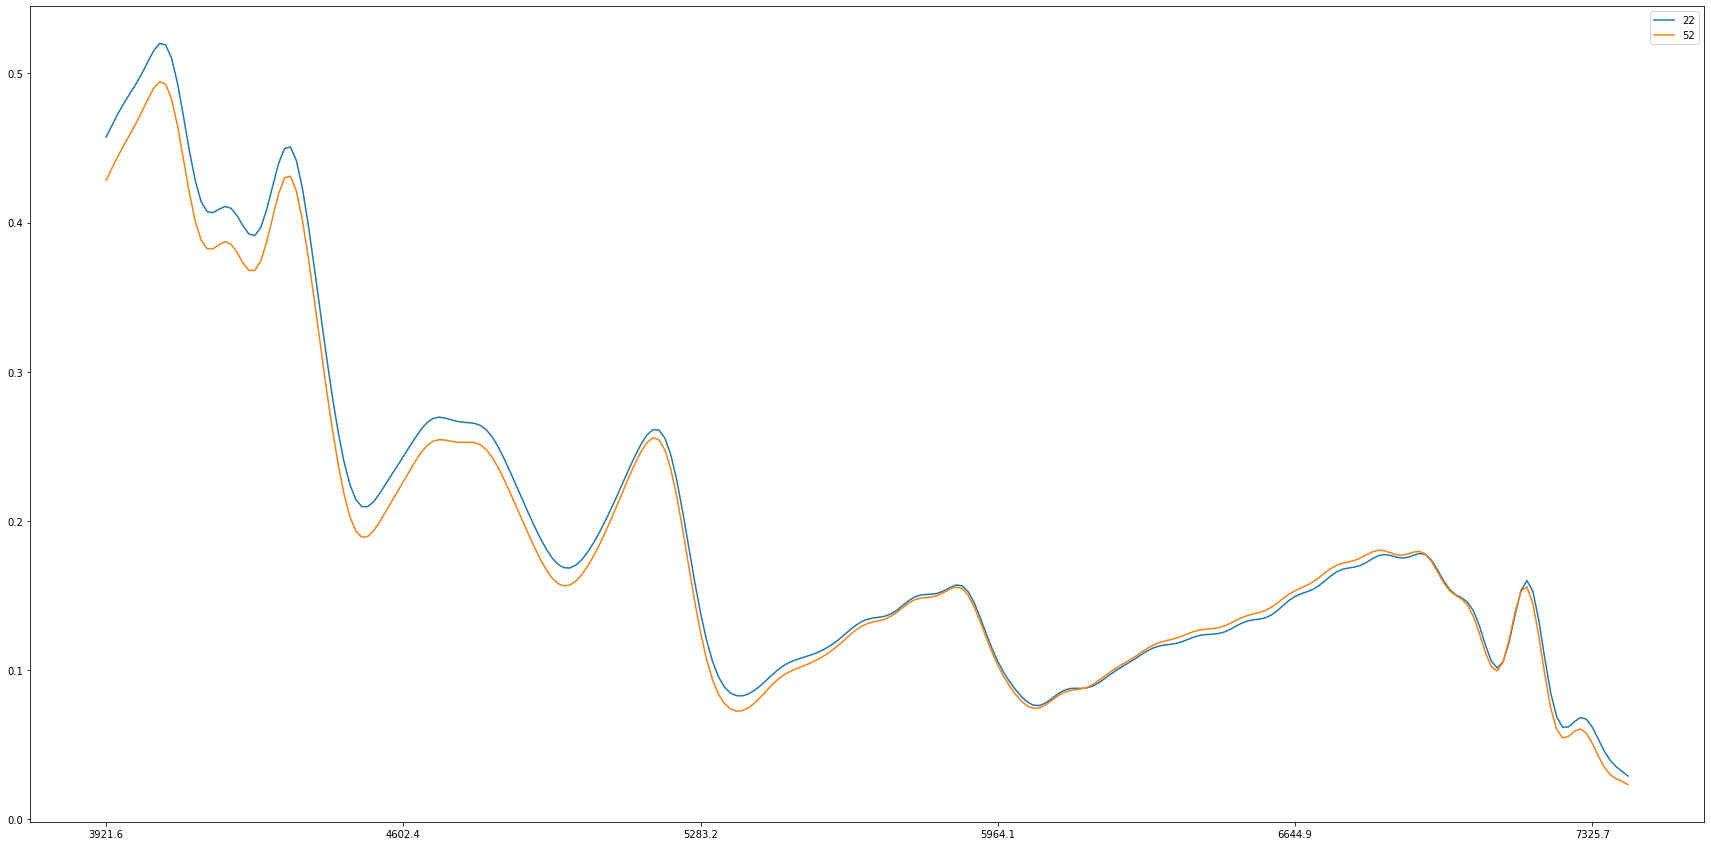

In [354]:
index = 0 # the sample number from 0 to 29
#df_3.iloc[index].plot(label='3')
#df_3.iloc[index+1].plot(label='3')
#df_3.iloc[index+2].plot(label='3')

#df_11.iloc[index].plot(label='11')
#df_11.iloc[index+1].plot(label='11')
#df_11.iloc[index+2].plot(label='11')

#df_16.iloc[index].plot(label='16')
#df_16.iloc[index+1].plot(label='16')
#df_16.iloc[index+2].plot(label='16')


df_22.iloc[index].plot(label='22')
#df_22.iloc[index+1].plot(label='22')
#df_22.iloc[index+2].plot(label='22')

#df_41.iloc[index].plot(label='41')
#df_41.iloc[index+1].plot(label='41')
#df_41.iloc[index+2].plot(label='41')

df_52.iloc[index].plot(label='52')
#df_52.iloc[index+1].plot(label='52')
#df_52.iloc[index+2].plot(label='52')

#df_74.iloc[index].plot(label='74')
#df_74.iloc[index+1].plot(label='74')
#df_74.iloc[index+2].plot(label='74')

plt.legend()

In [355]:
wav = df_52.keys()

In [356]:
"""
df_52 = np.gradient(df_52.to_numpy(),axis=1)
df_52 = pd.DataFrame(df_52,columns=wav)
df_22 = np.gradient(df_22.to_numpy(),axis=1)
df_22 = pd.DataFrame(df_22,columns=wav)
#spectra_abs_test = np.gradient(spectra_abs_test.copy(deep=True).to_numpy(),axis=1)
#spectra_abs_test = pd.DataFrame(spectra_abs_test,columns=wav)
#spectra_abs_test.iloc[0].plot()
df_52.iloc[4].plot()
df_22.iloc[4].plot()
"""

'\ndf_52 = np.gradient(df_52.to_numpy(),axis=1)\ndf_52 = pd.DataFrame(df_52,columns=wav)\ndf_22 = np.gradient(df_22.to_numpy(),axis=1)\ndf_22 = pd.DataFrame(df_22,columns=wav)\n#spectra_abs_test = np.gradient(spectra_abs_test.copy(deep=True).to_numpy(),axis=1)\n#spectra_abs_test = pd.DataFrame(spectra_abs_test,columns=wav)\n#spectra_abs_test.iloc[0].plot()\ndf_52.iloc[4].plot()\ndf_22.iloc[4].plot()\n'

# Using SNV :

In [357]:
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [358]:
wav = df_52.keys()
_52 = snv(df_52.copy(deep=True).to_numpy())
_52 = pd.DataFrame(_52,columns=wav)
_22 = snv(df_22.copy(deep=True).to_numpy())
_22 = pd.DataFrame(_22,columns=wav) 

In [359]:
tlc_pls = PLSRegression(n_components=9)
starch_pls = PLSRegression(n_components=3)

In [360]:
np.mean(cross_val_score(tlc_pls,_52,df_ref['TLC/SUM'],cv=3,scoring='r2'))

0.8783735203795756

In [361]:
np.mean(cross_val_score(starch_pls,_52,df_ref['Starch/SUM'],cv=3,scoring='r2'))

0.8378109285538772

In [362]:
tlc_pls.fit(_52,df_ref['TLC/SUM'])
starch_pls.fit(_52,df_ref['Starch/SUM'])

PLSRegression(n_components=3)

In [363]:
print('the MSE of TLC on Master: ',mean_squared_error(df_ref['TLC/SUM'],tlc_pls.predict(_52)))
print('the MSE of Starch on Master: ',mean_squared_error(df_ref['Starch/SUM'],starch_pls.predict(_52)))

the MSE of TLC on Master:  5.101012594899824
the MSE of Starch on Master:  15.714377485212754


In [364]:
print('the MSE of TLC on Slave: ',mean_squared_error(df_ref['TLC/SUM'],tlc_pls.predict(_22)))
print('the MSE of Starch on Slave: ',mean_squared_error(df_ref['Starch/SUM'],starch_pls.predict(_22)))

the MSE of TLC on Slave:  44.008666397221575
the MSE of Starch on Slave:  26.711126223209288


# Using MSC:

In [365]:

def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''
 
    # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
 
    # Get the reference spectrum. If not given, estimate it from the mean    
    if reference is None:    
        # Calculate mean
        ref = np.mean(input_data, axis=0)
    else:
        ref = reference
 
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
 
    return (data_msc, ref)

In [366]:
wav = df_52.keys()
_52,r = msc(df_52.copy(deep=True).to_numpy())
_52 = pd.DataFrame(_52,columns=wav)
_22,_ = msc(df_22.copy(deep=True).to_numpy(),reference=r)
_22 = pd.DataFrame(_22,columns=wav) 

In [367]:
tlc_pls = PLSRegression(n_components=9)
starch_pls = PLSRegression(n_components=6)

In [368]:
np.mean(cross_val_score(tlc_pls,_52,df_ref['TLC/SUM'],cv=3,scoring='r2'))

0.8940491545518877

In [369]:
np.mean(cross_val_score(starch_pls,_52,df_ref['Starch/SUM'],cv=3,scoring='r2'))

0.6427060536913307

In [370]:
tlc_pls.fit(_52,df_ref['TLC/SUM'])
starch_pls.fit(_52,df_ref['Starch/SUM'])

PLSRegression(n_components=6)

In [371]:
print('the MSE of TLC on Master: ',mean_squared_error(df_ref['TLC/SUM'],tlc_pls.predict(_52)))
print('the MSE of Starch on Master: ',mean_squared_error(df_ref['Starch/SUM'],starch_pls.predict(_52)))

the MSE of TLC on Master:  4.714943348622782
the MSE of Starch on Master:  11.151826396057299


In [372]:
print('the MSE of TLC on Slave: ',mean_squared_error(df_ref['TLC/SUM'],tlc_pls.predict(_22)))
print('the MSE of Starch on Slave: ',mean_squared_error(df_ref['Starch/SUM'],starch_pls.predict(_22)))

the MSE of TLC on Slave:  44.258751427235254
the MSE of Starch on Slave:  22.680837017561558
